In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('/Rainfall Data.csv')

In [8]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [9]:
# Check the number of years of data for each state (SUBDIVISION)
years_per_state = df.groupby('SUBDIVISION')['YEAR'].nunique()

# Filter to find states that do not have 115 years of data
states_less_than_115_years = years_per_state[years_per_state != 115]

In [10]:
column_names = df.columns
print(column_names)

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')


In [11]:
# Find the number of unique values in the 'SUBDIVISION' column
num_unique_values = df['SUBDIVISION'].nunique()

print(f"The number of unique values in the 'SUBDIVISION' column is: {num_unique_values}")

The number of unique values in the 'SUBDIVISION' column is: 36


In [12]:
print("States that do not have 115 years of data:")
print(states_less_than_115_years)

States that do not have 115 years of data:
SUBDIVISION
ANDAMAN & NICOBAR ISLANDS    110
ARUNACHAL PRADESH             97
LAKSHADWEEP                  114
Name: YEAR, dtype: int64


In [13]:
years_per_subdivision = df.groupby('SUBDIVISION')['YEAR'].nunique()
states_to_drop = years_per_subdivision[years_per_subdivision != 115].index.tolist()
df_filtered = df[~df['SUBDIVISION'].isin(states_to_drop)]

In [14]:
num_states_filtered = df_filtered['SUBDIVISION'].nunique()
print(f"\nNumber of states (SUBDIVISIONs) in the filtered dataset: {num_states_filtered}")

# Verify the number of years of data for each state in the filtered DataFrame
years_per_state_filtered = df_filtered.groupby('SUBDIVISION')['YEAR'].nunique()


Number of states (SUBDIVISIONs) in the filtered dataset: 33


In [15]:
year_range_per_state = df_filtered.groupby('SUBDIVISION')['YEAR'].agg(['min', 'max'])

# Check if the year range is the same for all states
if year_range_per_state['min'].nunique() == 1 and year_range_per_state['max'].nunique() == 1:
    common_min_year = year_range_per_state['min'].iloc[0]
    common_max_year = year_range_per_state['max'].iloc[0]
    print(f"The common year range for all states is: {common_min_year} - {common_max_year}")
else:
    print("The year range is not the same for all states:")
    print(year_range_per_state)

The common year range for all states is: 1901 - 2015


In [16]:
df_filtered.to_csv('Standardised Data.csv', index=False)

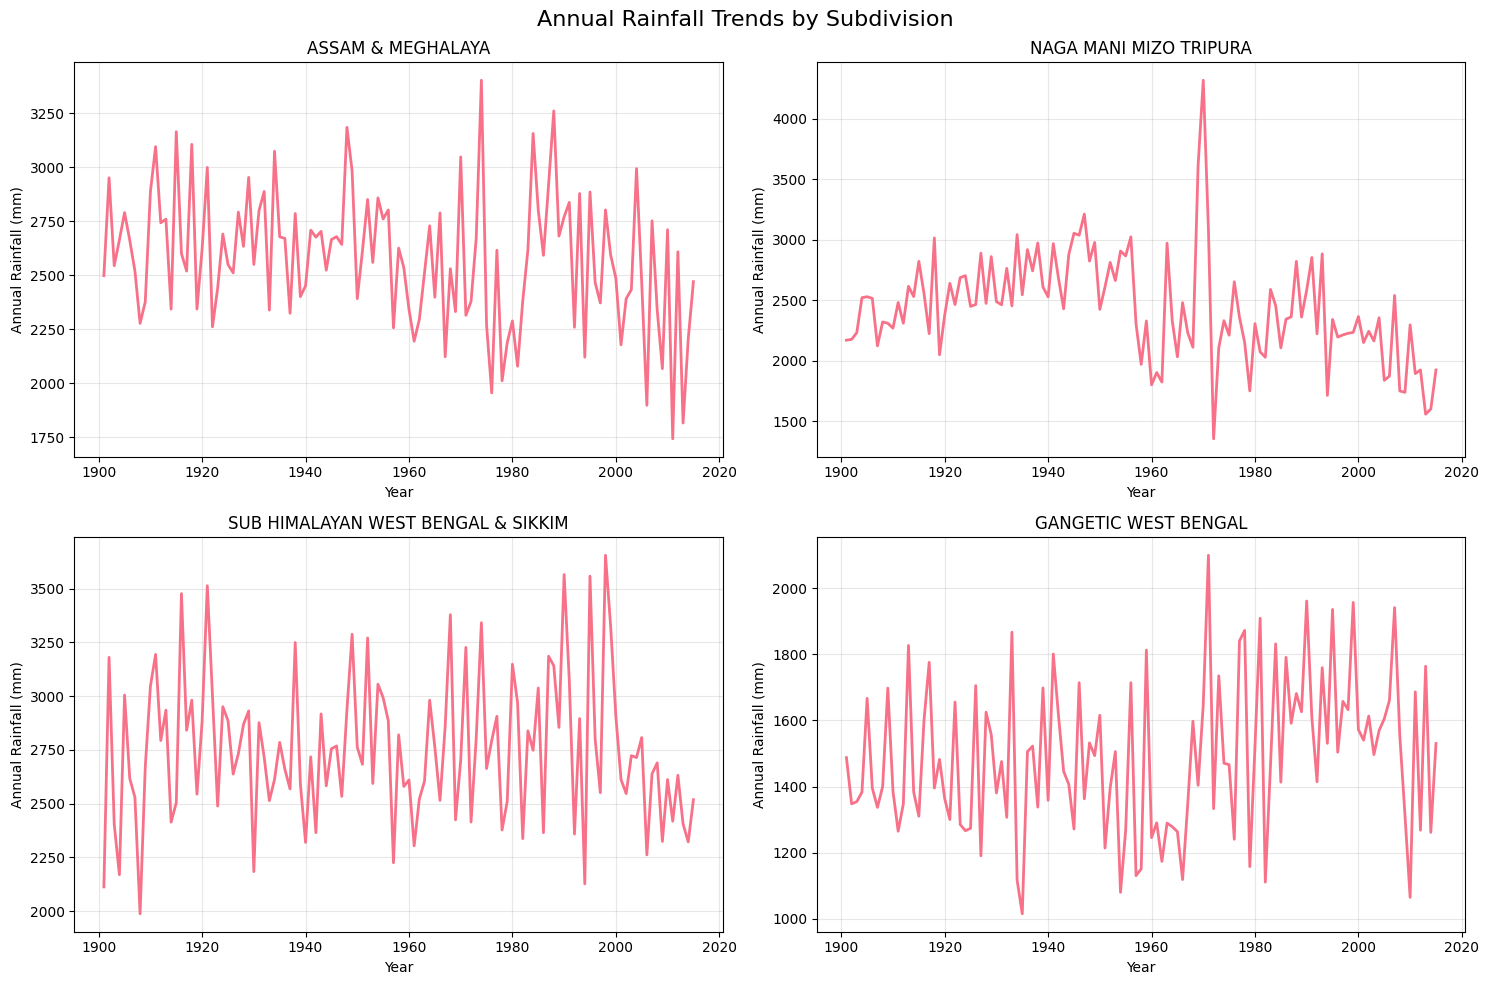

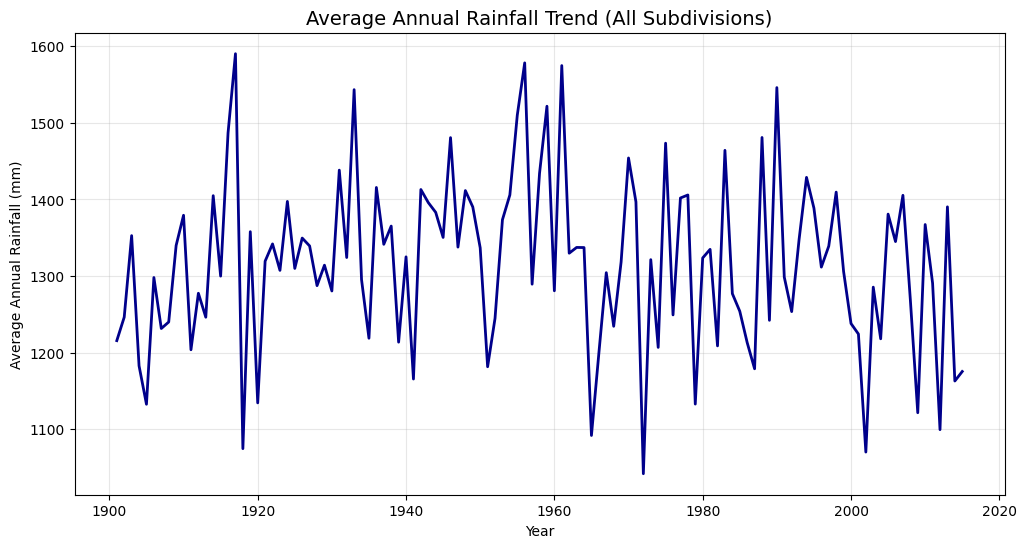

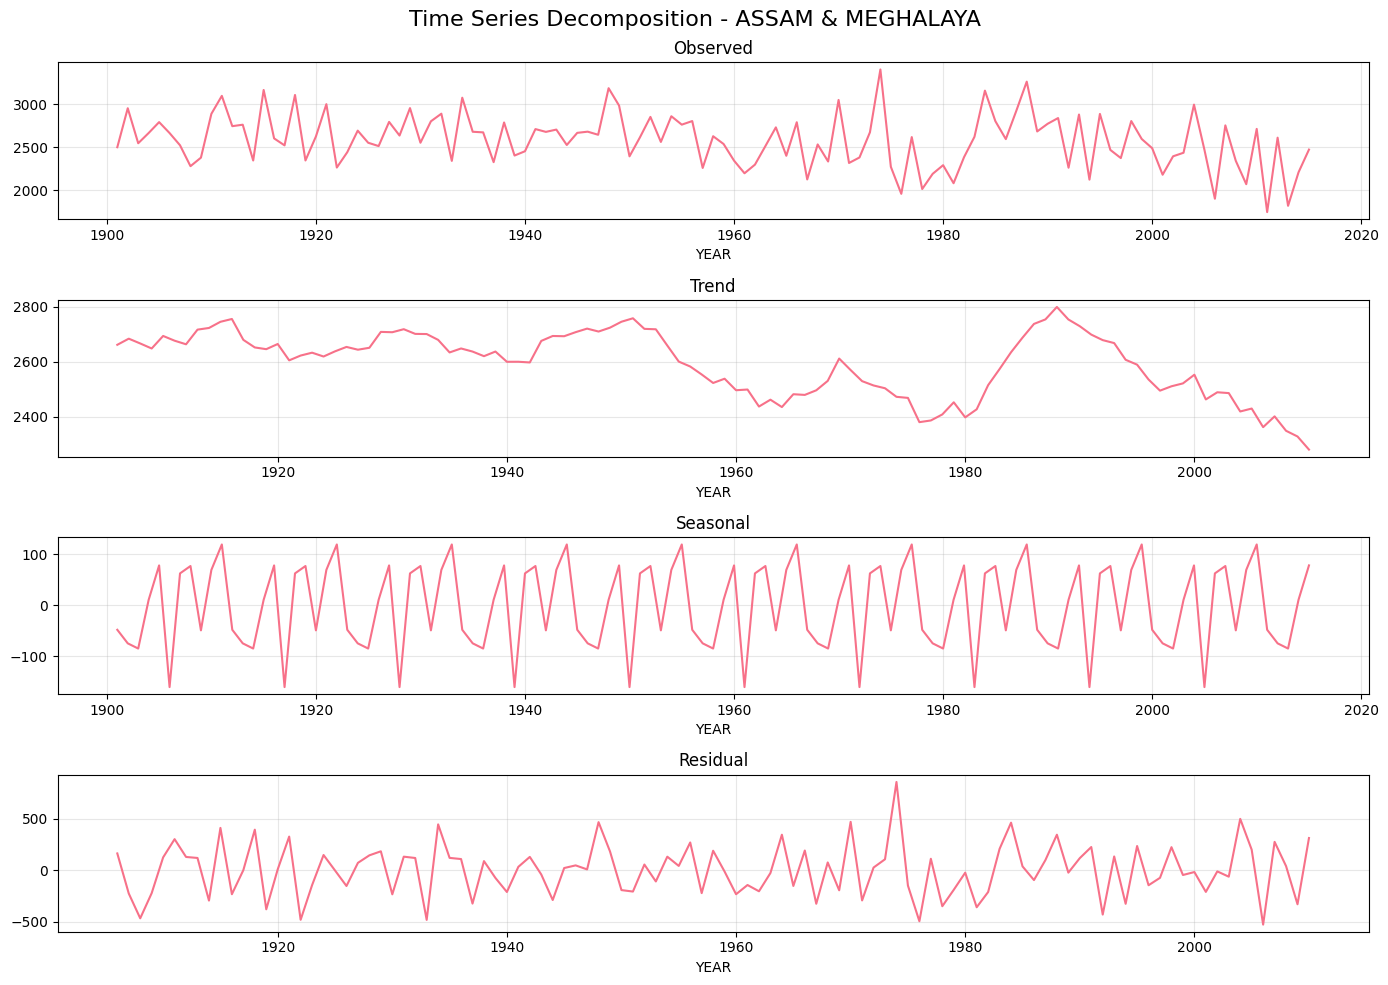

In [19]:
# Temporal Pattern Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# ===== TREND ANALYSIS =====

# 1. Plot annual rainfall trends for each subdivision
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Annual Rainfall Trends by Subdivision', fontsize=16)

subdivisions = df_filtered['SUBDIVISION'].unique()[:4]  # Plot first 4 subdivisions
for i, subdivision in enumerate(subdivisions):
    ax = axes[i//2, i%2]
    subset = df_filtered[df_filtered['SUBDIVISION'] == subdivision]
    ax.plot(subset['YEAR'], subset['ANNUAL'], linewidth=2)
    ax.set_title(f'{subdivision}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Annual Rainfall (mm)')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Overall annual rainfall trend (averaged across all subdivisions)
annual_avg = df_filtered.groupby('YEAR')['ANNUAL'].mean()
plt.figure(figsize=(12, 6))
plt.plot(annual_avg.index, annual_avg.values, linewidth=2, color='darkblue')
plt.title('Average Annual Rainfall Trend (All Subdivisions)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Annual Rainfall (mm)')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Seasonal decomposition for a sample subdivision
sample_subdivision = subdivisions[0]
sample_data = df_filtered[df_filtered['SUBDIVISION'] == sample_subdivision].set_index('YEAR')['ANNUAL']

# Perform seasonal decomposition (assuming some periodicity)
decomposition = seasonal_decompose(sample_data, model='additive', period=11)  # Adjust period as needed

fig, axes = plt.subplots(4, 1, figsize=(14, 10))
fig.suptitle(f'Time Series Decomposition - {sample_subdivision}', fontsize=16)

decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')

for ax in axes:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

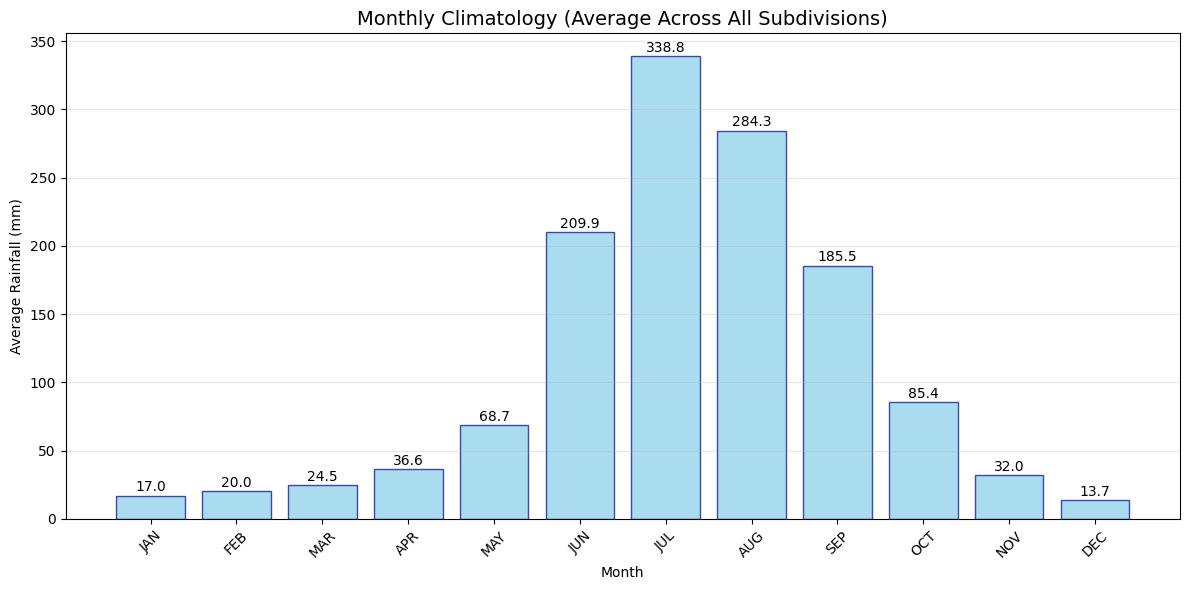

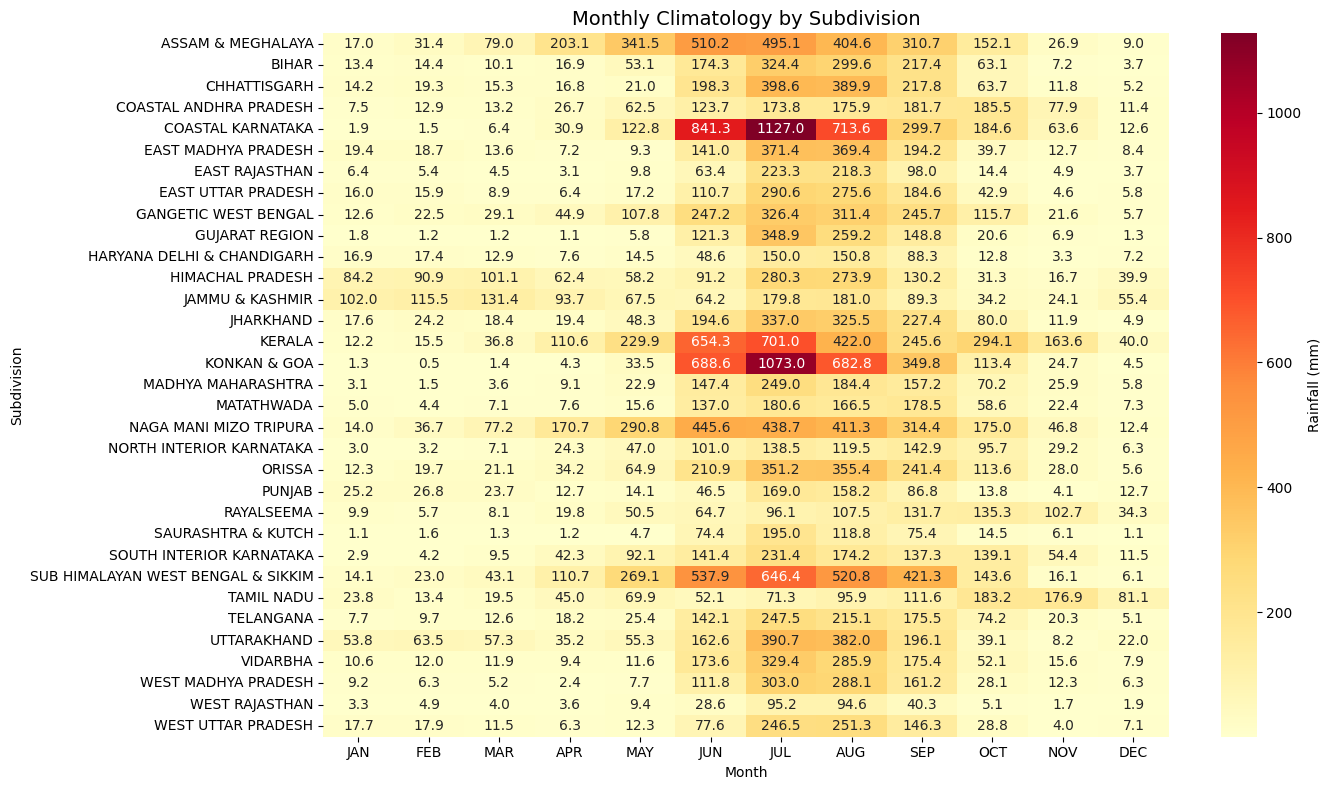

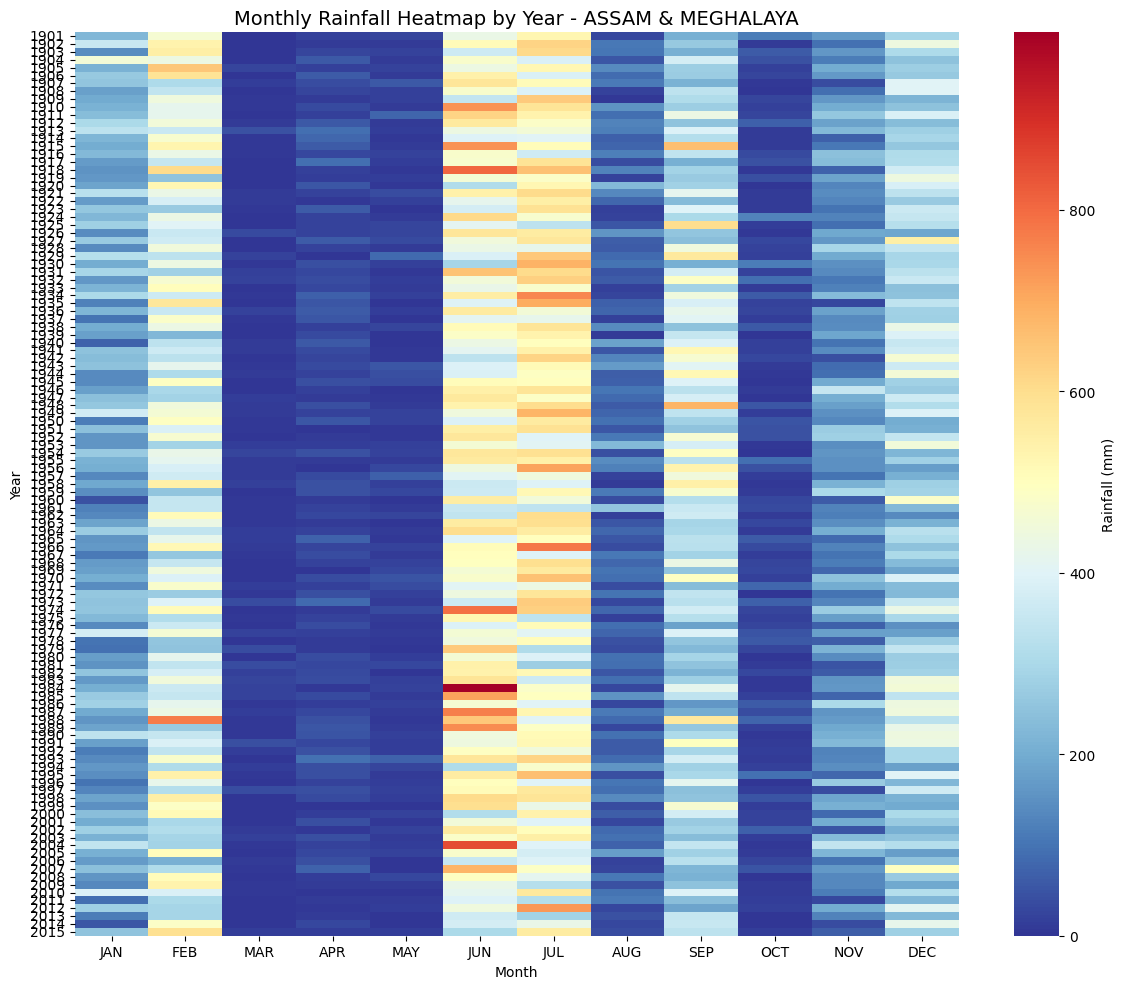

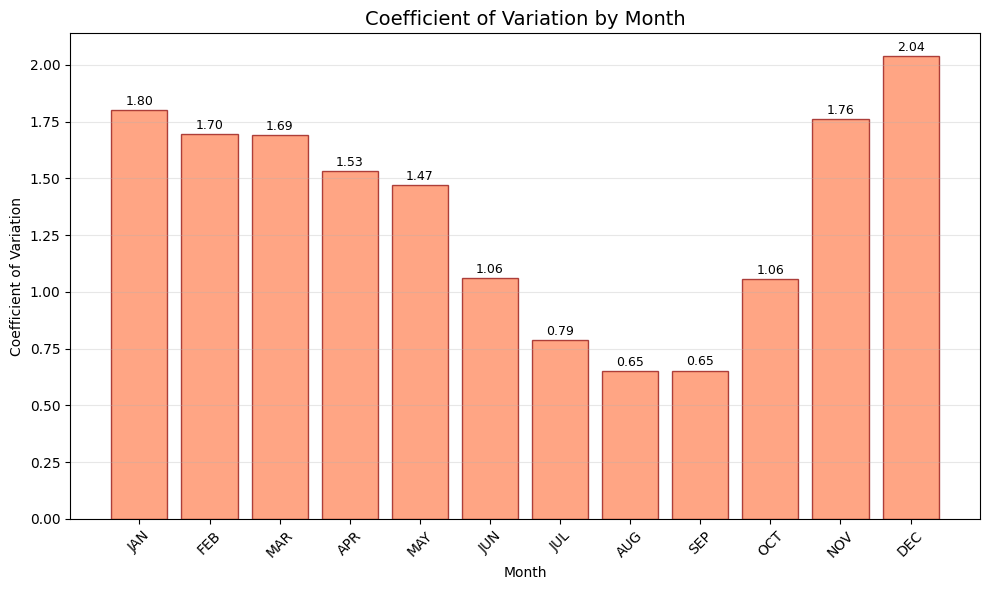

In [20]:
# Seasonality Exploration

# ===== MONTHLY CLIMATOLOGY =====

# 1. Monthly climatology (average rainfall by month across all years)
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Calculate monthly averages across all subdivisions and years
monthly_avg = df_filtered[months].mean()

plt.figure(figsize=(12, 6))
bars = plt.bar(months, monthly_avg.values, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Monthly Climatology (Average Across All Subdivisions)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, monthly_avg.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Monthly climatology by subdivision (heatmap)
plt.figure(figsize=(14, 8))
monthly_by_subdivision = df_filtered.groupby('SUBDIVISION')[months].mean()

sns.heatmap(monthly_by_subdivision, cmap='YlOrRd', annot=True, fmt='.1f',
            cbar_kws={'label': 'Rainfall (mm)'})
plt.title('Monthly Climatology by Subdivision', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Subdivision')
plt.tight_layout()
plt.show()

# 3. Seasonal pattern variation over time (heatmap by year)
# Create a heatmap showing monthly rainfall by year for a sample subdivision
sample_subdivision = df_filtered['SUBDIVISION'].unique()[0]
sample_data = df_filtered[df_filtered['SUBDIVISION'] == sample_subdivision]
monthly_by_year = sample_data.pivot_table(index='YEAR', columns=None, values=months)

plt.figure(figsize=(12, 10))
sns.heatmap(monthly_by_year.values, xticklabels=months,
            yticklabels=sample_data['YEAR'].values,
            cmap='RdYlBu_r', cbar_kws={'label': 'Rainfall (mm)'})
plt.title(f'Monthly Rainfall Heatmap by Year - {sample_subdivision}', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# 4. Coefficient of Variation by month
monthly_cv = df_filtered[months].std() / df_filtered[months].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(months, monthly_cv.values, color='coral', edgecolor='darkred', alpha=0.7)
plt.title('Coefficient of Variation by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars, monthly_cv.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

STATIONARITY TESTING - ANNUAL RAINFALL
ADF Test Results for ASSAM & MEGHALAYA - Annual:
ADF Statistic: -4.128476
p-value: 0.000869
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581
Result: Series is stationary
--------------------------------------------------
ADF Test Results for NAGA MANI MIZO TRIPURA - Annual:
ADF Statistic: -1.749210
p-value: 0.405953
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Result: Series is non-stationary
--------------------------------------------------
ADF Test Results for SUB HIMALAYAN WEST BENGAL & SIKKIM - Annual:
ADF Statistic: -4.890810
p-value: 0.000036
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581
Result: Series is stationary
--------------------------------------------------

STATIONARITY TESTING - MONTHLY RAINFALL
ADF Test Results for ASSAM & MEGHALAYA - JAN:
ADF Statistic: -9.944567
p-value: 0.000000
Critical Values:
	1%: -3.489
	5%: -2.887
	10%: -2.580
Result: Series is stationary
--------------------------------------------

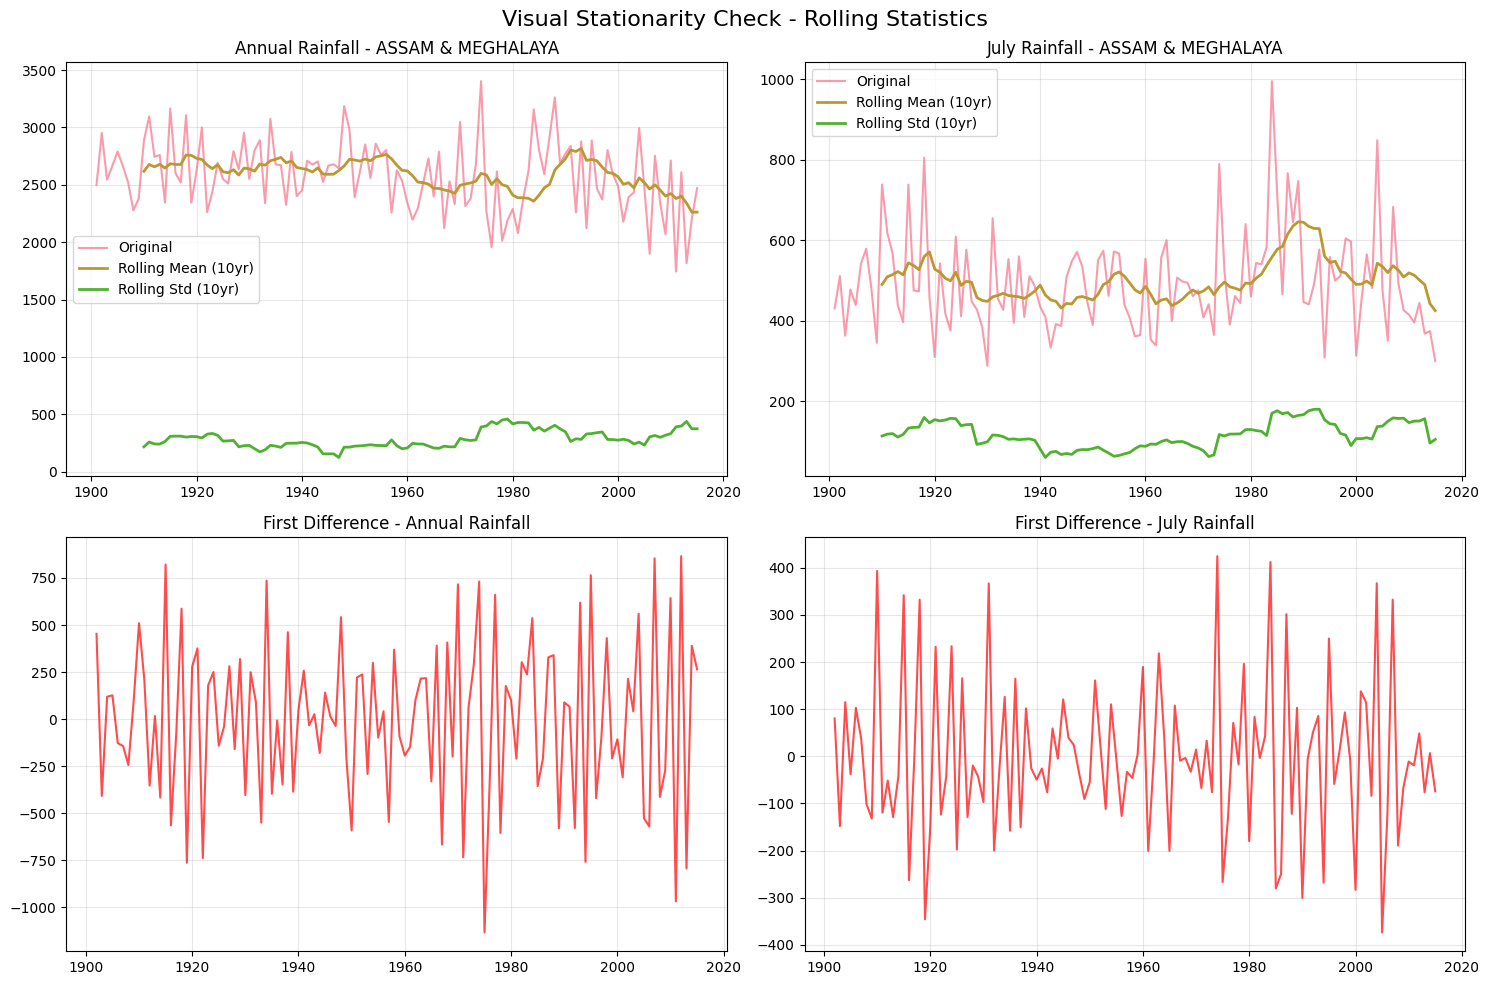


STATIONARITY TESTING - FIRST DIFFERENCES
ADF Test Results for ASSAM & MEGHALAYA - Annual (First Difference):
ADF Statistic: -4.804164
p-value: 0.000053
Critical Values:
	1%: -3.497
	5%: -2.891
	10%: -2.582
Result: Series is stationary
--------------------------------------------------
ADF Test Results for ASSAM & MEGHALAYA - July (First Difference):
ADF Statistic: -9.620714
p-value: 0.000000
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581
Result: Series is stationary
--------------------------------------------------


In [21]:
# Stationarity Testing

# ===== STATIONARITY TESTS =====

def adf_test(timeseries, title):
    """
    Perform Augmented Dickey-Fuller test for stationarity
    """
    result = adfuller(timeseries.dropna(), autolag='AIC')

    print(f'ADF Test Results for {title}:')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

    if result[1] <= 0.05:
        print("Result: Series is stationary")
    else:
        print("Result: Series is non-stationary")
    print("-" * 50)

# 1. Test stationarity for annual rainfall (sample subdivisions)
print("STATIONARITY TESTING - ANNUAL RAINFALL")
print("=" * 60)

sample_subdivisions = df_filtered['SUBDIVISION'].unique()[:3]  # Test first 3 subdivisions

for subdivision in sample_subdivisions:
    subset = df_filtered[df_filtered['SUBDIVISION'] == subdivision]
    annual_series = subset.set_index('YEAR')['ANNUAL']
    adf_test(annual_series, f'{subdivision} - Annual')

# 2. Test stationarity for monthly data (sample subdivision and months)
print("\nSTATIONARITY TESTING - MONTHLY RAINFALL")
print("=" * 60)

sample_subdivision = sample_subdivisions[0]
subset = df_filtered[df_filtered['SUBDIVISION'] == sample_subdivision]

sample_months = ['JAN', 'APR', 'JUL', 'OCT']  # Test seasonal months
for month in sample_months:
    monthly_series = subset.set_index('YEAR')[month]
    adf_test(monthly_series, f'{sample_subdivision} - {month}')

# 3. Visual inspection of stationarity
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Visual Stationarity Check - Rolling Statistics', fontsize=16)

sample_subdivision = sample_subdivisions[0]
subset = df_filtered[df_filtered['SUBDIVISION'] == sample_subdivision].set_index('YEAR')

# Plot rolling mean and std for annual data
annual_data = subset['ANNUAL']
rolling_mean = annual_data.rolling(window=10).mean()
rolling_std = annual_data.rolling(window=10).std()

ax1 = axes[0, 0]
ax1.plot(annual_data.index, annual_data.values, label='Original', alpha=0.7)
ax1.plot(rolling_mean.index, rolling_mean.values, label='Rolling Mean (10yr)', linewidth=2)
ax1.plot(rolling_std.index, rolling_std.values, label='Rolling Std (10yr)', linewidth=2)
ax1.set_title(f'Annual Rainfall - {sample_subdivision}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot for a sample month
month_data = subset['JUL']  # July as example
rolling_mean_month = month_data.rolling(window=10).mean()
rolling_std_month = month_data.rolling(window=10).std()

ax2 = axes[0, 1]
ax2.plot(month_data.index, month_data.values, label='Original', alpha=0.7)
ax2.plot(rolling_mean_month.index, rolling_mean_month.values, label='Rolling Mean (10yr)', linewidth=2)
ax2.plot(rolling_std_month.index, rolling_std_month.values, label='Rolling Std (10yr)', linewidth=2)
ax2.set_title(f'July Rainfall - {sample_subdivision}')
ax2.legend()
ax2.grid(True, alpha=0.3)

# First difference plots
ax3 = axes[1, 0]
annual_diff = annual_data.diff().dropna()
ax3.plot(annual_diff.index, annual_diff.values, color='red', alpha=0.7)
ax3.set_title('First Difference - Annual Rainfall')
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
month_diff = month_data.diff().dropna()
ax4.plot(month_diff.index, month_diff.values, color='red', alpha=0.7)
ax4.set_title('First Difference - July Rainfall')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Test first differences for stationarity
print("\nSTATIONARITY TESTING - FIRST DIFFERENCES")
print("=" * 60)

adf_test(annual_diff, f'{sample_subdivision} - Annual (First Difference)')
adf_test(month_diff, f'{sample_subdivision} - July (First Difference)')

In [13]:
# Initialize dictionary to store missing data by state and year
missing_data_by_state_year = {}

# Columns to check for missing data (all columns except 'SUBDIVISION' and 'YEAR')
# Now uses df_filtered.columns
columns_to_check = [col for col in df_filtered.columns if col not in ['SUBDIVISION', 'YEAR']]

# Iterate through each unique state (SUBDIVISION) in df_filtered
for subdivision in df_filtered['SUBDIVISION'].unique():
    # Use df_filtered for filtering the state-specific DataFrame
    state_df = df_filtered[df_filtered['SUBDIVISION'] == subdivision].copy()

    # Iterate through rows for the current state to find missing data
    for index, row in state_df.iterrows():
        missing_columns_in_row = []
        for col in columns_to_check:
            if pd.isna(row[col]):
                missing_columns_in_row.append(col)

        if missing_columns_in_row:
            year = row['YEAR']
            if subdivision not in missing_data_by_state_year:
                missing_data_by_state_year[subdivision] = []

            # Append a list with Year and missing columns
            missing_data_by_state_year[subdivision].append([year] + missing_columns_in_row)

if not missing_data_by_state_year:
    print("All relevant columns in all states have complete data in df_filtered.")
else:
    print("Missing data points found in df_filtered for the following states and years:")
    for state, data_list in missing_data_by_state_year.items():
        print(f"'{state}': {data_list}")

Missing data points found in df_filtered for the following states and years:
'JAMMU & KASHMIR': [[2009, 'JUL', 'NOV', 'DEC', 'ANNUAL', 'Jun-Sep', 'Oct-Dec']]
'WEST MADHYA PRADESH': [[2000, 'FEB', 'ANNUAL', 'Jan-Feb']]
'COASTAL KARNATAKA': [[2012, 'JAN', 'ANNUAL', 'Jan-Feb']]


VARIABILITY ANALYSIS
1. COEFFICIENT OF VARIATION BY MONTH AND SUBDIVISION
--------------------------------------------------
Coefficient of Variation by Month (All Subdivisions):
JAN: 1.799
FEB: 1.696
MAR: 1.691
APR: 1.532
MAY: 1.470
JUN: 1.061
JUL: 0.788
AUG: 0.651
SEP: 0.653
OCT: 1.057
NOV: 1.760
DEC: 2.037

Top 10 Most Variable Subdivisions (Annual Rainfall):
                               mean      std     cv
SUBDIVISION                                        
SAURASHTRA & KUTCH          495.162  201.928  0.408
WEST RAJASTHAN              292.673  108.843  0.372
GUJARAT REGION              918.230  278.415  0.303
PUNJAB                      593.536  163.358  0.275
HARYANA DELHI & CHANDIGARH  530.497  142.180  0.268
EAST RAJASTHAN              655.216  166.433  0.254
MATATHWADA                  790.692  189.210  0.239
WEST UTTAR PRADESH          827.115  189.643  0.229
TELANGANA                   953.378  205.926  0.216
EAST UTTAR PRADESH          979.213  203.635  0.208

Top 10 Lea

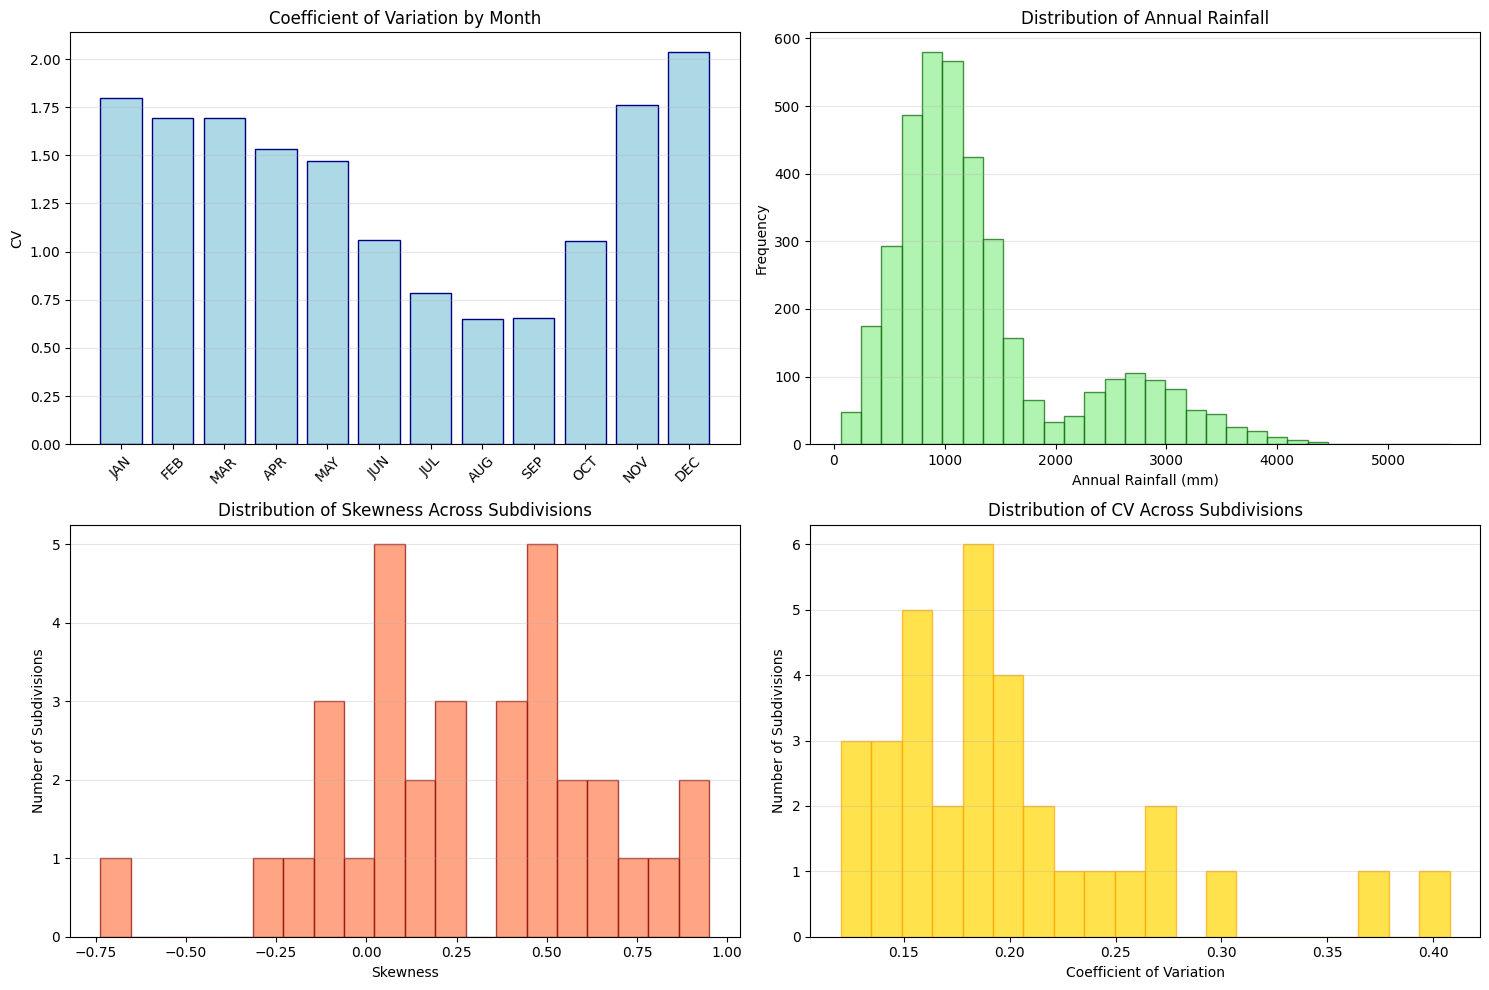


3. EXTREME EVENTS ANALYSIS
--------------------------------------------------
Extreme Event Summary:
Average drought threshold (10th percentile): 994.2 mm
Average flood threshold (90th percentile): 1552.1 mm
Average drought years per subdivision: 10.9
Average flood years per subdivision: 10.9


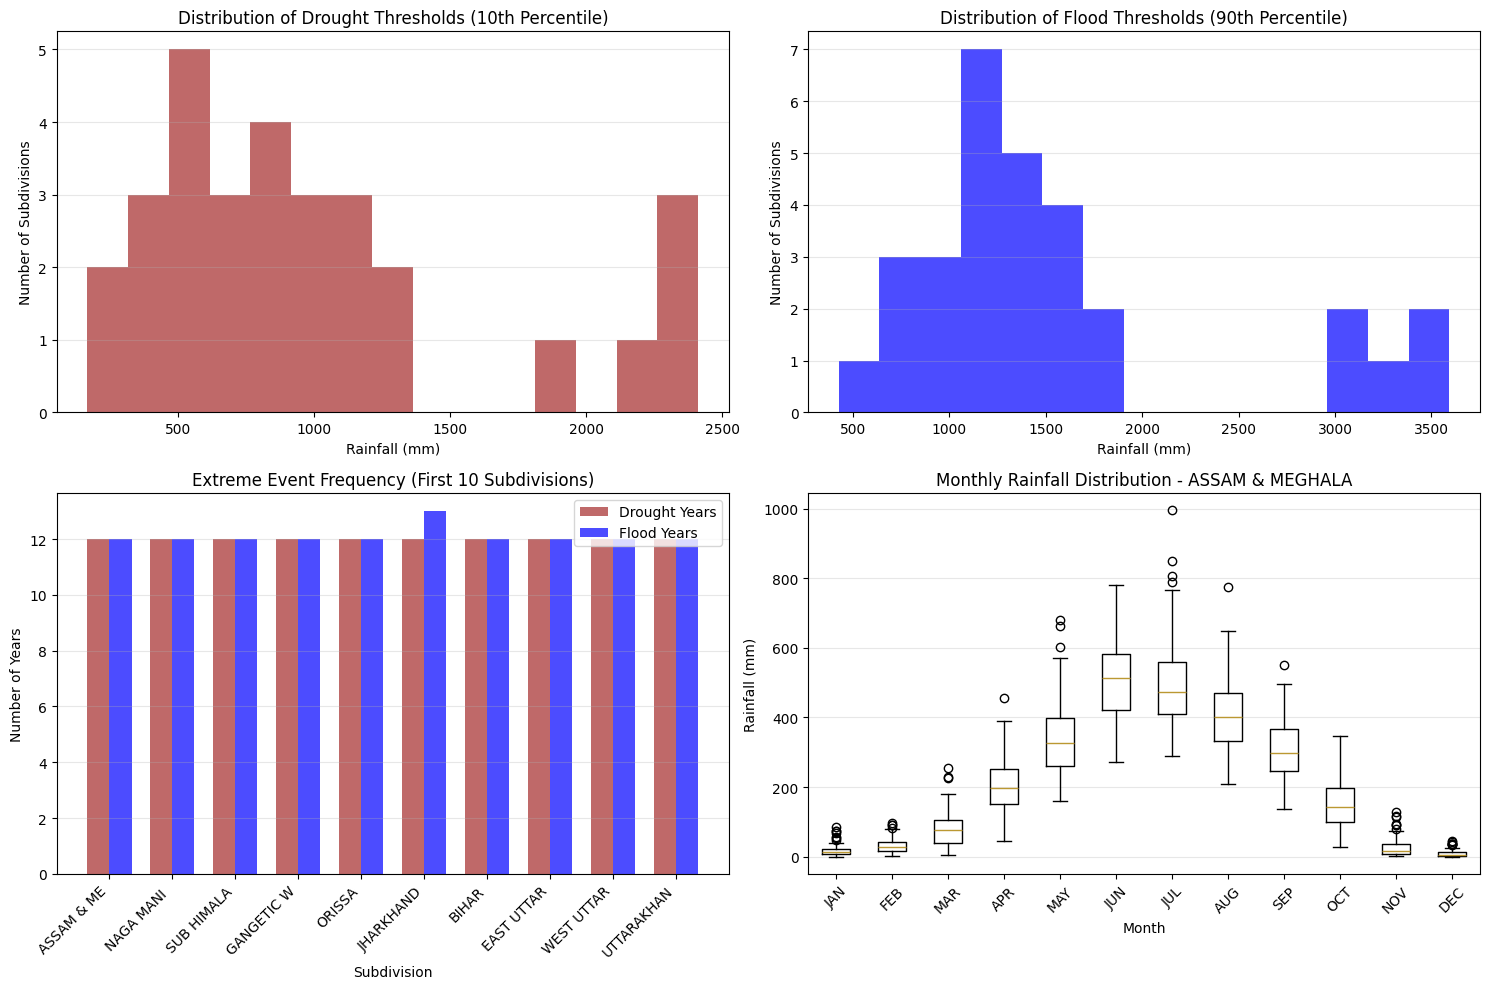


Sample Extreme Years Analysis:
Subdivision: ASSAM & MEGHALAYA
Sample drought years: [1961, 1967, 1976, 1978, 1979]
Sample flood years: [1911, 1915, 1918, 1921, 1934]


In [23]:
# Distribution and Variability Analysis

from scipy import stats

# ===== STATISTICAL SUMMARIES =====

print("VARIABILITY ANALYSIS")
print("=" * 50)

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# 1. Coefficient of Variation analysis
print("1. COEFFICIENT OF VARIATION BY MONTH AND SUBDIVISION")
print("-" * 50)

# Calculate CV for each month across all subdivisions
monthly_cv = df_filtered[months].std() / df_filtered[months].mean()
print("Coefficient of Variation by Month (All Subdivisions):")
for month, cv in monthly_cv.items():
    print(f"{month}: {cv:.3f}")

# Calculate CV for each subdivision (annual rainfall)
subdivision_cv = df_filtered.groupby('SUBDIVISION')['ANNUAL'].agg(['mean', 'std'])
subdivision_cv['cv'] = subdivision_cv['std'] / subdivision_cv['mean']
subdivision_cv_sorted = subdivision_cv.sort_values('cv', ascending=False)

print(f"\nTop 10 Most Variable Subdivisions (Annual Rainfall):")
print(subdivision_cv_sorted.head(10)[['mean', 'std', 'cv']].round(3))

print(f"\nTop 10 Least Variable Subdivisions (Annual Rainfall):")
print(subdivision_cv_sorted.tail(10)[['mean', 'std', 'cv']].round(3))

# 2. Distribution analysis
print(f"\n2. DISTRIBUTION CHARACTERISTICS")
print("-" * 50)

# Analyze skewness and kurtosis for annual rainfall
annual_stats = df_filtered.groupby('SUBDIVISION')['ANNUAL'].agg([
    'mean', 'std', 'skew', lambda x: stats.kurtosis(x, fisher=False)
])
annual_stats.columns = ['mean', 'std', 'skewness', 'kurtosis']

print("Distribution Statistics for Annual Rainfall:")
print(annual_stats.describe().round(3))

# Plot distribution characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# CV by month
axes[0, 0].bar(months, monthly_cv.values, color='lightblue', edgecolor='navy')
axes[0, 0].set_title('Coefficient of Variation by Month')
axes[0, 0].set_ylabel('CV')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Histogram of annual rainfall (all data)
axes[0, 1].hist(df_filtered['ANNUAL'], bins=30, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
axes[0, 1].set_title('Distribution of Annual Rainfall')
axes[0, 1].set_xlabel('Annual Rainfall (mm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(axis='y', alpha=0.3)

# Skewness distribution
axes[1, 0].hist(annual_stats['skewness'], bins=20, color='coral', edgecolor='darkred', alpha=0.7)
axes[1, 0].set_title('Distribution of Skewness Across Subdivisions')
axes[1, 0].set_xlabel('Skewness')
axes[1, 0].set_ylabel('Number of Subdivisions')
axes[1, 0].grid(axis='y', alpha=0.3)

# CV distribution across subdivisions
axes[1, 1].hist(subdivision_cv['cv'], bins=20, color='gold', edgecolor='orange', alpha=0.7)
axes[1, 1].set_title('Distribution of CV Across Subdivisions')
axes[1, 1].set_xlabel('Coefficient of Variation')
axes[1, 1].set_ylabel('Number of Subdivisions')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ===== EXTREME EVENTS ANALYSIS =====

print(f"\n3. EXTREME EVENTS ANALYSIS")
print("-" * 50)

# Define thresholds for extreme events (percentiles)
drought_threshold = 0.1  # 10th percentile
flood_threshold = 0.9   # 90th percentile

# Calculate thresholds for each subdivision
extreme_stats = []

for subdivision in df_filtered['SUBDIVISION'].unique():
    subset = df_filtered[df_filtered['SUBDIVISION'] == subdivision]
    annual_data = subset['ANNUAL']

    drought_thresh = np.percentile(annual_data, drought_threshold * 100)
    flood_thresh = np.percentile(annual_data, flood_threshold * 100)

    drought_years = subset[annual_data <= drought_thresh]['YEAR'].tolist()
    flood_years = subset[annual_data >= flood_thresh]['YEAR'].tolist()

    extreme_stats.append({
        'subdivision': subdivision,
        'drought_threshold': drought_thresh,
        'flood_threshold': flood_thresh,
        'drought_years': len(drought_years),
        'flood_years': len(flood_years),
        'drought_year_list': drought_years[:5],  # First 5 drought years
        'flood_year_list': flood_years[:5]       # First 5 flood years
    })

# Convert to DataFrame for analysis
extreme_df = pd.DataFrame(extreme_stats)

print("Extreme Event Summary:")
print(f"Average drought threshold (10th percentile): {extreme_df['drought_threshold'].mean():.1f} mm")
print(f"Average flood threshold (90th percentile): {extreme_df['flood_threshold'].mean():.1f} mm")
print(f"Average drought years per subdivision: {extreme_df['drought_years'].mean():.1f}")
print(f"Average flood years per subdivision: {extreme_df['flood_years'].mean():.1f}")

# Plot extreme events
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of drought thresholds
axes[0, 0].hist(extreme_df['drought_threshold'], bins=15, color='brown', alpha=0.7)
axes[0, 0].set_title('Distribution of Drought Thresholds (10th Percentile)')
axes[0, 0].set_xlabel('Rainfall (mm)')
axes[0, 0].set_ylabel('Number of Subdivisions')
axes[0, 0].grid(axis='y', alpha=0.3)

# Distribution of flood thresholds
axes[0, 1].hist(extreme_df['flood_threshold'], bins=15, color='blue', alpha=0.7)
axes[0, 1].set_title('Distribution of Flood Thresholds (90th Percentile)')
axes[0, 1].set_xlabel('Rainfall (mm)')
axes[0, 1].set_ylabel('Number of Subdivisions')
axes[0, 1].grid(axis='y', alpha=0.3)

# Number of extreme years per subdivision
subdivisions_sample = extreme_df['subdivision'][:10]  # First 10 subdivisions
drought_counts = extreme_df['drought_years'][:10]
flood_counts = extreme_df['flood_years'][:10]

x = np.arange(len(subdivisions_sample))
width = 0.35

axes[1, 0].bar(x - width/2, drought_counts, width, label='Drought Years', color='brown', alpha=0.7)
axes[1, 0].bar(x + width/2, flood_counts, width, label='Flood Years', color='blue', alpha=0.7)
axes[1, 0].set_title('Extreme Event Frequency (First 10 Subdivisions)')
axes[1, 0].set_xlabel('Subdivision')
axes[1, 0].set_ylabel('Number of Years')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels([s[:10] for s in subdivisions_sample], rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Box plot of monthly rainfall for a sample subdivision
sample_subdivision = df_filtered['SUBDIVISION'].unique()[0]
sample_data = df_filtered[df_filtered['SUBDIVISION'] == sample_subdivision]
monthly_data = sample_data[months]

axes[1, 1].boxplot([monthly_data[month].dropna() for month in months], labels=months)
axes[1, 1].set_title(f'Monthly Rainfall Distribution - {sample_subdivision[:15]}')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Rainfall (mm)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Show some extreme years
print(f"\nSample Extreme Years Analysis:")
sample_sub = extreme_df.iloc[0]
print(f"Subdivision: {sample_sub['subdivision']}")
print(f"Sample drought years: {sample_sub['drought_year_list']}")
print(f"Sample flood years: {sample_sub['flood_year_list']}")

AUTOCORRELATION AND LAG ANALYSIS

Analyzing ASSAM & MEGHALAYA:


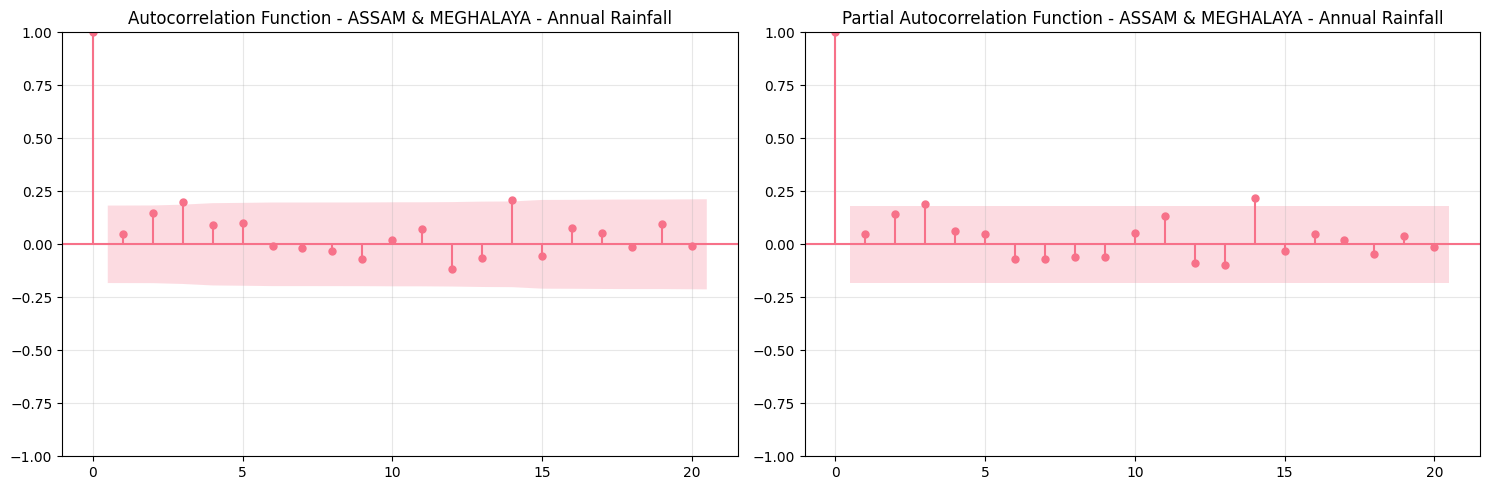

Significant ACF lags for ASSAM & MEGHALAYA - Annual Rainfall:
  Lag 3: 0.200
  Lag 14: 0.210
Significant PACF lags for ASSAM & MEGHALAYA - Annual Rainfall:
  Lag 3: 0.196
  Lag 14: 0.252
--------------------------------------------------

Analyzing NAGA MANI MIZO TRIPURA:


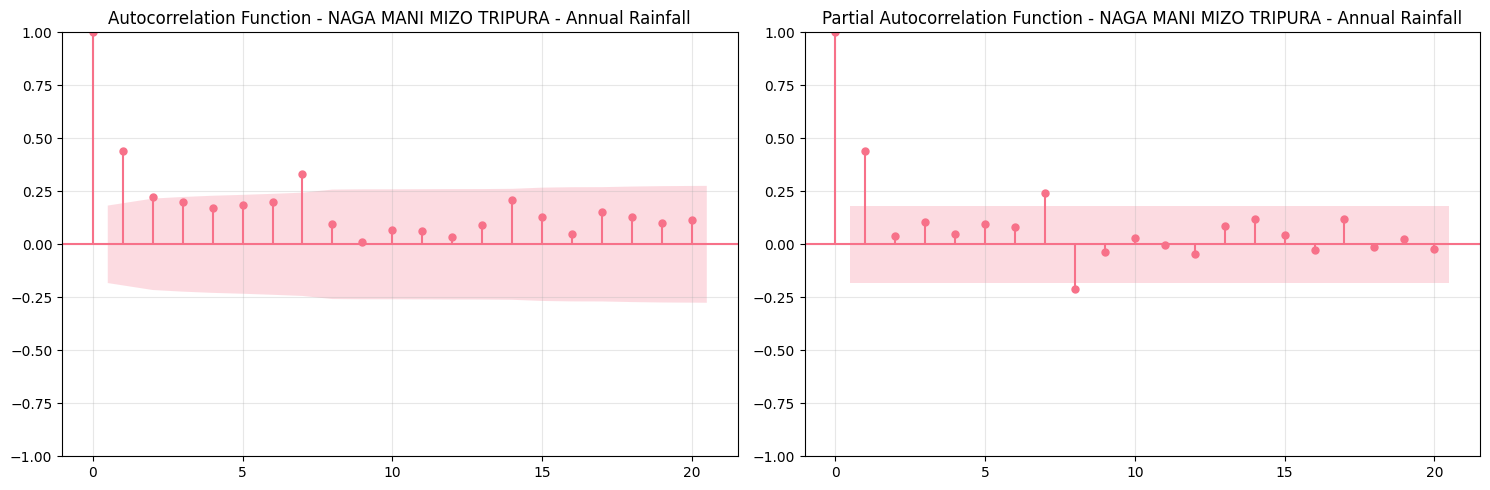

Significant ACF lags for NAGA MANI MIZO TRIPURA - Annual Rainfall:
  Lag 1: 0.442
  Lag 2: 0.225
  Lag 7: 0.331
Significant PACF lags for NAGA MANI MIZO TRIPURA - Annual Rainfall:
  Lag 1: 0.446
  Lag 7: 0.261
  Lag 8: -0.228
--------------------------------------------------

MONTHLY AUTOCORRELATION ANALYSIS

Analyzing ASSAM & MEGHALAYA - JAN:


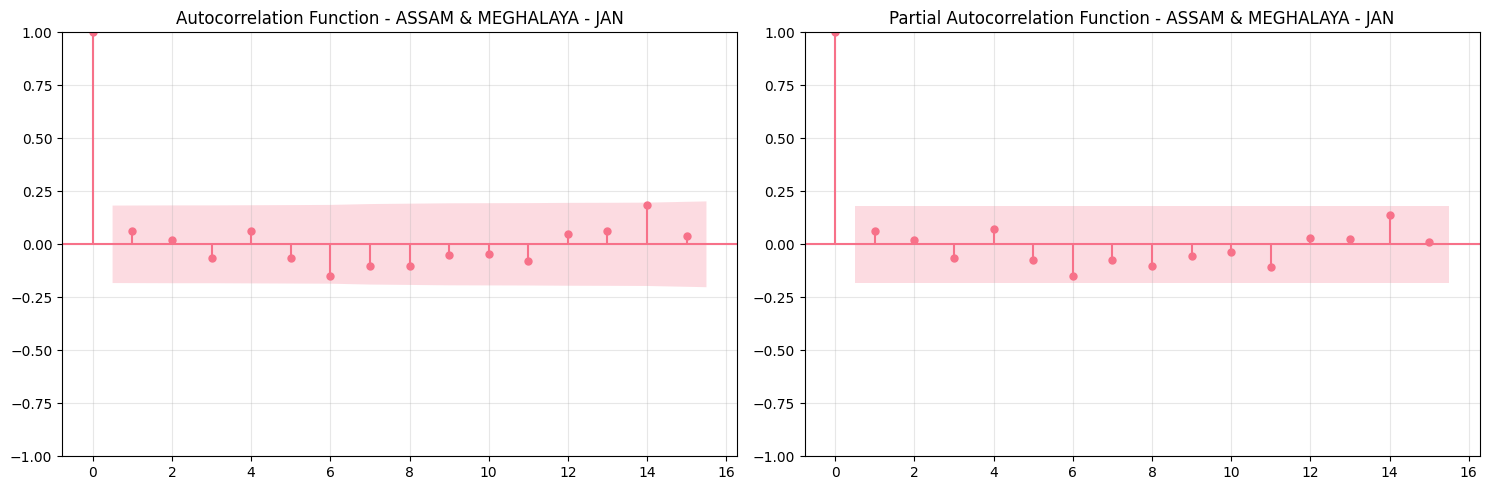

Significant ACF lags for ASSAM & MEGHALAYA - JAN:
  No significant ACF lags found
Significant PACF lags for ASSAM & MEGHALAYA - JAN:
  No significant PACF lags found
--------------------------------------------------

Analyzing ASSAM & MEGHALAYA - APR:


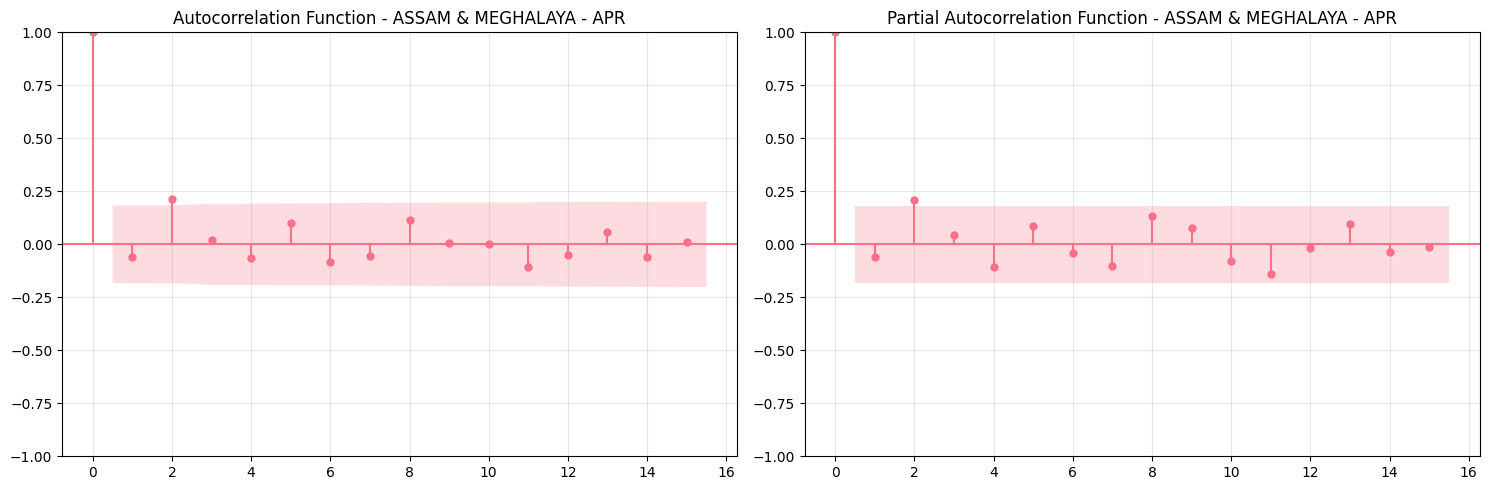

Significant ACF lags for ASSAM & MEGHALAYA - APR:
  Lag 2: 0.211
Significant PACF lags for ASSAM & MEGHALAYA - APR:
  Lag 2: 0.213
--------------------------------------------------

Analyzing ASSAM & MEGHALAYA - JUL:


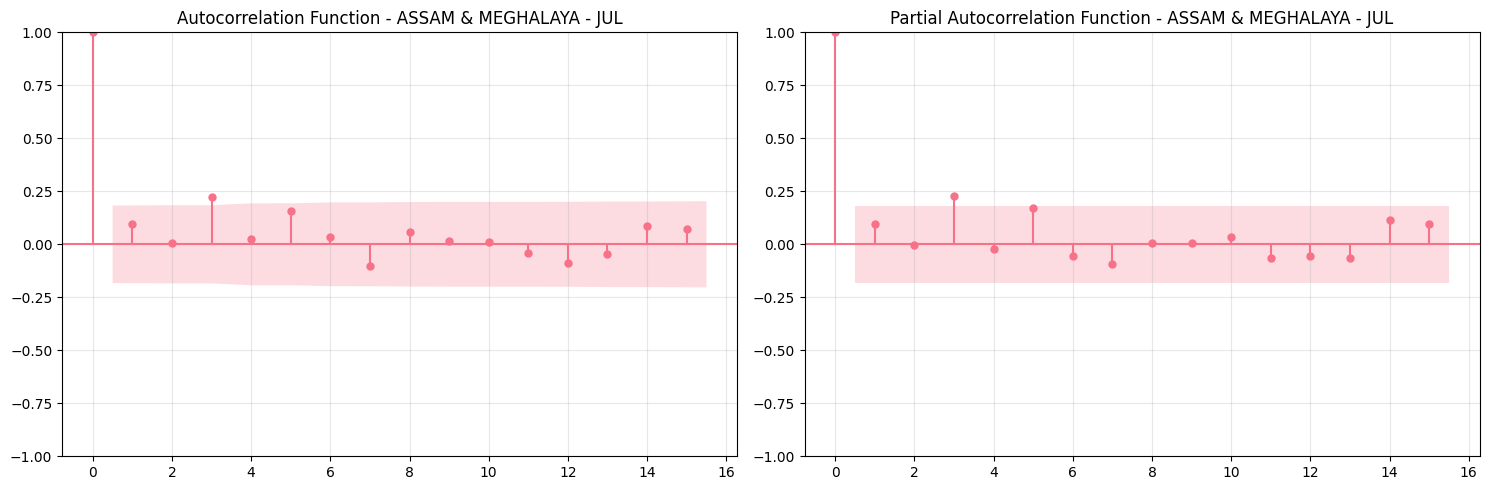

Significant ACF lags for ASSAM & MEGHALAYA - JUL:
  Lag 3: 0.224
Significant PACF lags for ASSAM & MEGHALAYA - JUL:
  Lag 3: 0.232
--------------------------------------------------

Analyzing ASSAM & MEGHALAYA - OCT:


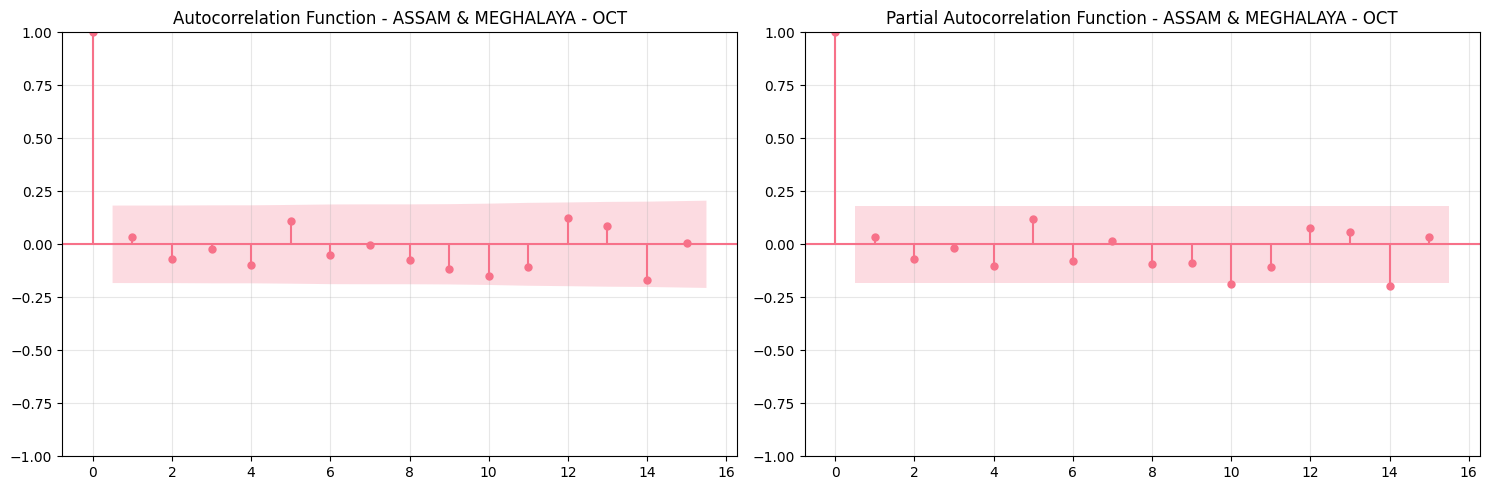

Significant ACF lags for ASSAM & MEGHALAYA - OCT:
  No significant ACF lags found
Significant PACF lags for ASSAM & MEGHALAYA - OCT:
  Lag 10: -0.208
  Lag 14: -0.228
--------------------------------------------------

FEATURE ENGINEERING ANALYSIS
Derived Features Summary:
       annual_3yr_avg  annual_5yr_avg  annual_3yr_std  annual_anomaly  \
count         226.000         222.000         226.000         230.000   
mean         2511.630        2517.276         267.107           0.000   
std           277.883         240.239         175.519           0.998   
min          1693.167        1778.900           6.636          -2.699   
25%          2329.192        2355.205         157.443          -0.637   
50%          2559.517        2549.780         230.817           0.036   
75%          2691.633        2688.710         329.157           0.619   
max          3668.967        3069.360        1487.977           4.361   

       monsoon_ratio  winter_ratio  annual_lag_1  annual_lag_2  annu

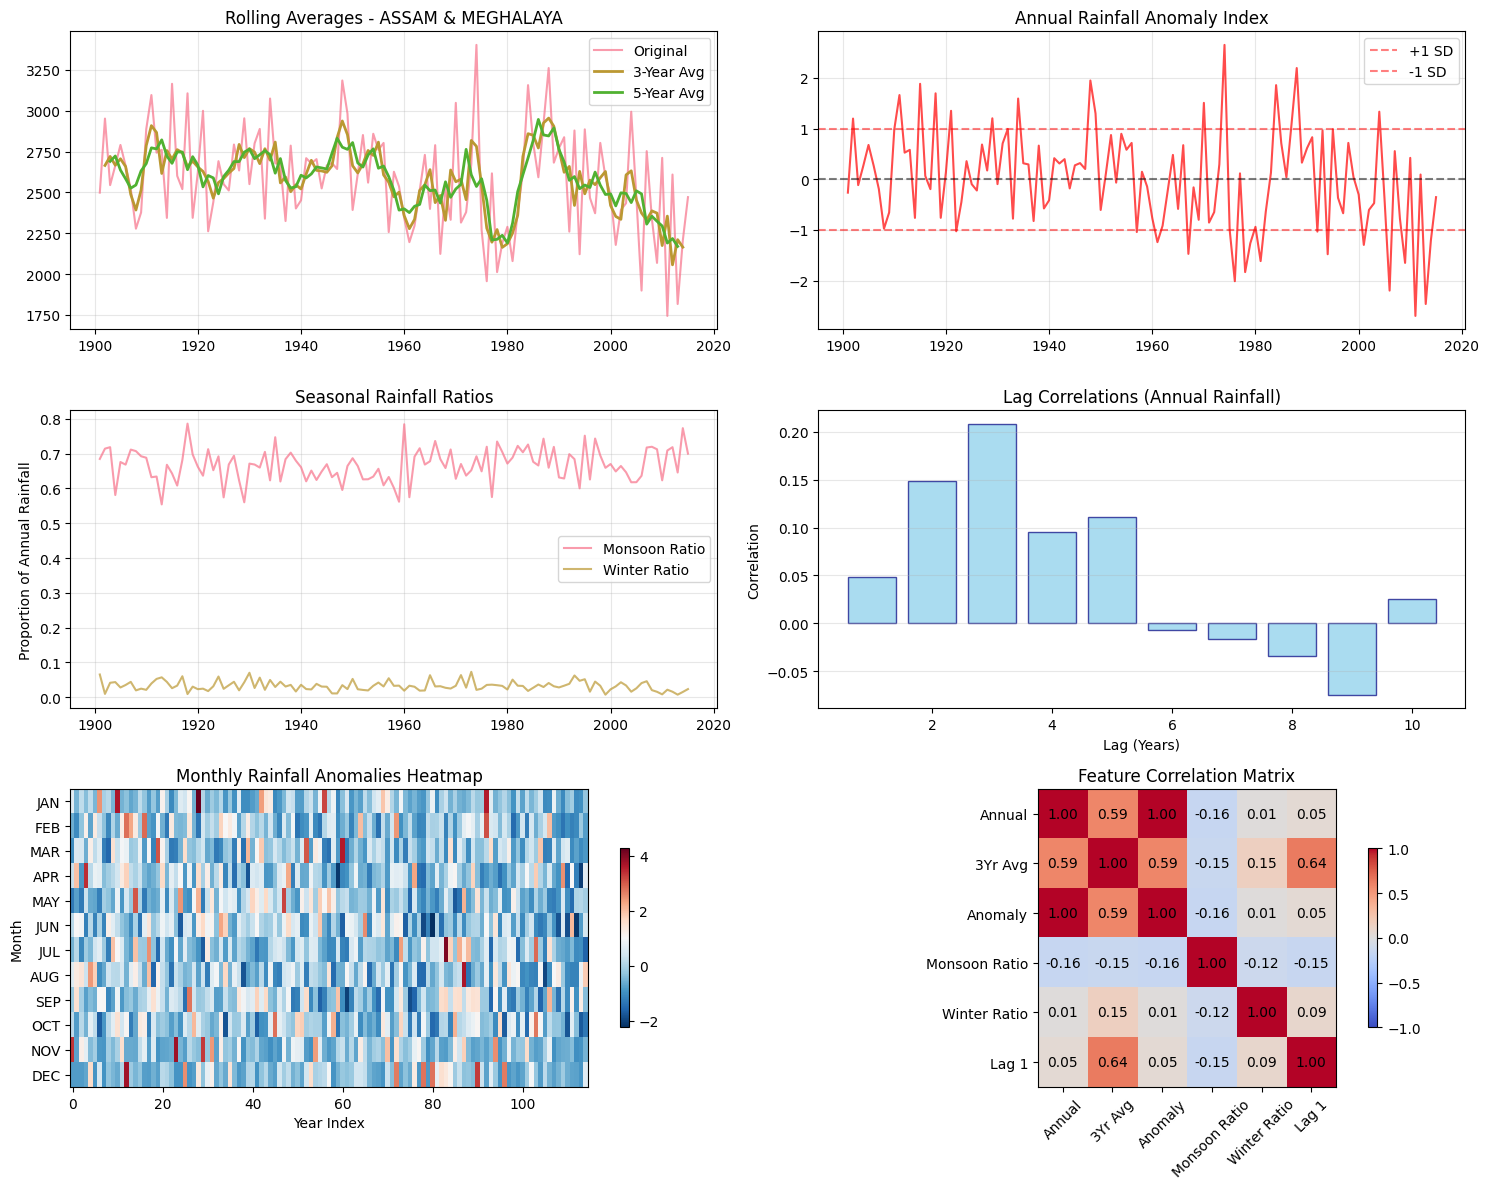


RECOMMENDED FEATURES FOR TIME SERIES MODELING
Based on the autocorrelation analysis, the following features are recommended:

Temporal Features:
- Lagged annual rainfall (1-3 years)
- Rolling averages (3-year, 5-year)
- Annual anomaly index (standardized deviations)

Seasonal Features:
- Monthly rainfall values
- Seasonal ratios (monsoon, winter, etc.)
- Monthly anomaly indices

Trend Features:
- Rolling standard deviation (volatility)
- Cumulative rainfall patterns
- Year as a trend component

Spatial Features (if modeling multiple subdivisions):
- Lagged rainfall from correlated subdivisions
- Regional averages and anomalies
- Spatial autocorrelation features


In [25]:
# Feature Engineering Insights

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ===== LAG ANALYSIS =====

print("AUTOCORRELATION AND LAG ANALYSIS")
print("=" * 50)

# 1. Autocorrelation analysis for different subdivisions and time series
def analyze_autocorrelation(data, title, max_lags=20):
    """
    Analyze and plot autocorrelation and partial autocorrelation
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # ACF plot
    plot_acf(data.dropna(), lags=max_lags, ax=axes[0], alpha=0.05)
    axes[0].set_title(f'Autocorrelation Function - {title}')
    axes[0].grid(True, alpha=0.3)

    # PACF plot
    plot_pacf(data.dropna(), lags=max_lags, ax=axes[1], alpha=0.05)
    axes[1].set_title(f'Partial Autocorrelation Function - {title}')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print significant lags
    acf_values = acf(data.dropna(), nlags=max_lags, alpha=0.05)
    pacf_values = pacf(data.dropna(), nlags=max_lags, alpha=0.05)

    print(f"Significant ACF lags for {title}:")
    significant_acf_lags = []
    for i in range(1, len(acf_values[0])):
        if abs(acf_values[0][i]) > abs(acf_values[1][i][1] - acf_values[0][i]):
            significant_acf_lags.append((i, acf_values[0][i]))

    if significant_acf_lags:
        for lag, value in significant_acf_lags[:5]:  # Show first 5
            print(f"  Lag {lag}: {value:.3f}")
    else:
        print("  No significant ACF lags found")

    print(f"Significant PACF lags for {title}:")
    significant_pacf_lags = []
    for i in range(1, len(pacf_values[0])):
        if abs(pacf_values[0][i]) > abs(pacf_values[1][i][1] - pacf_values[0][i]):
            significant_pacf_lags.append((i, pacf_values[0][i]))

    if significant_pacf_lags:
        for lag, value in significant_pacf_lags[:5]:  # Show first 5
            print(f"  Lag {lag}: {value:.3f}")
    else:
        print("  No significant PACF lags found")
    print("-" * 50)

# Analyze autocorrelation for sample subdivisions
sample_subdivisions = df_filtered['SUBDIVISION'].unique()[:2]

for subdivision in sample_subdivisions:
    subset = df_filtered[df_filtered['SUBDIVISION'] == subdivision]
    annual_series = subset.set_index('YEAR')['ANNUAL']

    print(f"\nAnalyzing {subdivision}:")
    analyze_autocorrelation(annual_series, f'{subdivision} - Annual Rainfall')

# 2. Monthly autocorrelation analysis
print(f"\nMONTHLY AUTOCORRELATION ANALYSIS")
print("=" * 50)

sample_subdivision = sample_subdivisions[0]
subset = df_filtered[df_filtered['SUBDIVISION'] == sample_subdivision]

# Analyze seasonal months
seasonal_months = ['JAN', 'APR', 'JUL', 'OCT']
for month in seasonal_months:
    monthly_series = subset.set_index('YEAR')[month]
    print(f"\nAnalyzing {sample_subdivision} - {month}:")
    analyze_autocorrelation(monthly_series, f'{sample_subdivision} - {month}', max_lags=15)

# ===== DERIVED VARIABLES AND FEATURE ENGINEERING =====

print(f"\nFEATURE ENGINEERING ANALYSIS")
print("=" * 50)

# 3. Create and analyze derived features
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# For each subdivision, create derived features
derived_features_sample = []

for subdivision in sample_subdivisions:
    subset = df_filtered[df_filtered['SUBDIVISION'] == subdivision].copy()
    subset = subset.sort_values('YEAR').reset_index(drop=True)

    # Rolling averages and standard deviations
    subset['annual_3yr_avg'] = subset['ANNUAL'].rolling(window=3, center=True).mean()
    subset['annual_5yr_avg'] = subset['ANNUAL'].rolling(window=5, center=True).mean()
    subset['annual_3yr_std'] = subset['ANNUAL'].rolling(window=3, center=True).std()

    # Anomaly indices (deviation from long-term mean)
    long_term_mean = subset['ANNUAL'].mean()
    long_term_std = subset['ANNUAL'].std()
    subset['annual_anomaly'] = (subset['ANNUAL'] - long_term_mean) / long_term_std

    # Monthly anomalies
    for month in months:
        month_mean = subset[month].mean()
        month_std = subset[month].std()
        subset[f'{month}_anomaly'] = (subset[month] - month_mean) / month_std

    # Cumulative rainfall
    subset['annual_cumulative'] = subset['ANNUAL'].cumsum()

    # Seasonal ratios
    subset['monsoon_ratio'] = (subset['JUN'] + subset['JUL'] + subset['AUG'] + subset['SEP']) / subset['ANNUAL']
    subset['winter_ratio'] = (subset['NOV'] + subset['DEC'] + subset['JAN'] + subset['FEB']) / subset['ANNUAL']

    # Lag features
    for lag in [1, 2, 3]:
        subset[f'annual_lag_{lag}'] = subset['ANNUAL'].shift(lag)

    derived_features_sample.append(subset)

# Combine and analyze derived features
combined_derived = pd.concat(derived_features_sample, ignore_index=True)

print("Derived Features Summary:")
derived_cols = ['annual_3yr_avg', 'annual_5yr_avg', 'annual_3yr_std', 'annual_anomaly',
                'monsoon_ratio', 'winter_ratio', 'annual_lag_1', 'annual_lag_2', 'annual_lag_3']

print(combined_derived[derived_cols].describe().round(3))

# 4. Plot derived features
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Rolling averages
sample_data = derived_features_sample[0]  # First subdivision
axes[0, 0].plot(sample_data['YEAR'], sample_data['ANNUAL'], label='Original', alpha=0.7)
axes[0, 0].plot(sample_data['YEAR'], sample_data['annual_3yr_avg'], label='3-Year Avg', linewidth=2)
axes[0, 0].plot(sample_data['YEAR'], sample_data['annual_5yr_avg'], label='5-Year Avg', linewidth=2)
axes[0, 0].set_title(f'Rolling Averages - {sample_subdivisions[0]}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Anomaly index
axes[0, 1].plot(sample_data['YEAR'], sample_data['annual_anomaly'], color='red', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 1].axhline(y=1, color='red', linestyle='--', alpha=0.5, label='+1 SD')
axes[0, 1].axhline(y=-1, color='red', linestyle='--', alpha=0.5, label='-1 SD')
axes[0, 1].set_title('Annual Rainfall Anomaly Index')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Seasonal ratios
axes[1, 0].plot(sample_data['YEAR'], sample_data['monsoon_ratio'], label='Monsoon Ratio', alpha=0.7)
axes[1, 0].plot(sample_data['YEAR'], sample_data['winter_ratio'], label='Winter Ratio', alpha=0.7)
axes[1, 0].set_title('Seasonal Rainfall Ratios')
axes[1, 0].set_ylabel('Proportion of Annual Rainfall')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Lag correlation analysis
lag_correlations = []
for lag in range(1, 11):
    temp_data = sample_data[['ANNUAL']].copy()
    temp_data[f'lag_{lag}'] = temp_data['ANNUAL'].shift(lag)
    corr = temp_data['ANNUAL'].corr(temp_data[f'lag_{lag}'])
    lag_correlations.append(corr)

axes[1, 1].bar(range(1, 11), lag_correlations, alpha=0.7, color='skyblue', edgecolor='navy')
axes[1, 1].set_title('Lag Correlations (Annual Rainfall)')
axes[1, 1].set_xlabel('Lag (Years)')
axes[1, 1].set_ylabel('Correlation')
axes[1, 1].grid(axis='y', alpha=0.3)

# Monthly anomaly heatmap
monthly_anomaly_cols = [f'{month}_anomaly' for month in months]
monthly_anomalies = sample_data[monthly_anomaly_cols].dropna()

im = axes[2, 0].imshow(monthly_anomalies.T, cmap='RdBu_r', aspect='auto', interpolation='nearest')
axes[2, 0].set_title('Monthly Rainfall Anomalies Heatmap')
axes[2, 0].set_xlabel('Year Index')
axes[2, 0].set_ylabel('Month')
axes[2, 0].set_yticks(range(12))
axes[2, 0].set_yticklabels(months)
plt.colorbar(im, ax=axes[2, 0], shrink=0.6)

# Feature correlation matrix
feature_cols = ['ANNUAL', 'annual_3yr_avg', 'annual_anomaly', 'monsoon_ratio', 'winter_ratio', 'annual_lag_1']
feature_corr = sample_data[feature_cols].corr()

im2 = axes[2, 1].imshow(feature_corr, cmap='coolwarm', aspect='equal', vmin=-1, vmax=1)
axes[2, 1].set_title('Feature Correlation Matrix')
axes[2, 1].set_xticks(range(len(feature_cols)))
axes[2, 1].set_yticks(range(len(feature_cols)))
axes[2, 1].set_xticklabels([col.replace('annual_', '').replace('_', ' ').title() for col in feature_cols], rotation=45)
axes[2, 1].set_yticklabels([col.replace('annual_', '').replace('_', ' ').title() for col in feature_cols])

# Add correlation values to heatmap
for i in range(len(feature_cols)):
    for j in range(len(feature_cols)):
        axes[2, 1].text(j, i, f'{feature_corr.iloc[i, j]:.2f}',
                       ha='center', va='center', fontsize=10)

plt.colorbar(im2, ax=axes[2, 1], shrink=0.6)

plt.tight_layout()
plt.show()

# 5. Summary of recommended features for modeling
print(f"\nRECOMMENDED FEATURES FOR TIME SERIES MODELING")
print("=" * 60)
print("Based on the autocorrelation analysis, the following features are recommended:")
print("\nTemporal Features:")
print("- Lagged annual rainfall (1-3 years)")
print("- Rolling averages (3-year, 5-year)")
print("- Annual anomaly index (standardized deviations)")
print("\nSeasonal Features:")
print("- Monthly rainfall values")
print("- Seasonal ratios (monsoon, winter, etc.)")
print("- Monthly anomaly indices")
print("\nTrend Features:")
print("- Rolling standard deviation (volatility)")
print("- Cumulative rainfall patterns")
print("- Year as a trend component")
print("\nSpatial Features (if modeling multiple subdivisions):")
print("- Lagged rainfall from correlated subdivisions")
print("- Regional averages and anomalies")
print("- Spatial autocorrelation features")

In [28]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset, calling the initial DataFrame df_filtered as requested
df_filtered = pd.read_csv('/Standardised Data.csv')

# Melt the DataFrame to long format for monthly data
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_long_melted = df_filtered.melt(id_vars=['SUBDIVISION', 'YEAR'], value_vars=months, var_name='MONTH', value_name='RAINFALL')

# Map month names to numbers for easier date handling
month_mapping = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
df_long_melted['MONTH_NUM'] = df_long_melted['MONTH'].map(month_mapping)

# Create a 'DATE' column (first day of the month)
df_long_melted['DATE'] = pd.to_datetime(df_long_melted['YEAR'].astype(str) + '-' + df_long_melted['MONTH_NUM'].astype(str) + '-01')

# Sort by subdivision and date
df_long_melted = df_long_melted.sort_values(by=['SUBDIVISION', 'DATE']).reset_index(drop=True)

# Handle missing values by dropping rows with NaN in 'RAINFALL'
df_long_melted.dropna(subset=['RAINFALL'], inplace=True)

# Define training and testing periods
train_start_year = 1901
train_end_year = 2010
test_start_year = 2011
test_end_year = 2015

# Split the data into training and testing sets
train_data = df_long_melted[(df_long_melted['YEAR'] >= train_start_year) & (df_long_melted['YEAR'] <= train_end_year)]
test_data = df_long_melted[(df_long_melted['YEAR'] >= test_start_year) & (df_long_melted['YEAR'] <= test_end_year)]

# Define window size for forecasting
window_size = 5

print(f"Rainfall Forecasting with {window_size}-year window")
print("=" * 60)

# Add forecast column
test_data['FORECAST'] = np.nan

# Implement the naive forecasting model
for index, row in test_data.iterrows():
    subdivision = row['SUBDIVISION']
    month_num = row['MONTH_NUM']
    current_year = row['YEAR']

    # Define the window for calculating the average in the training data
    start_forecast_year_for_avg = current_year - window_size
    end_forecast_year_for_avg = current_year - 1

    # Filter training data for the specific subdivision and month within the window
    relevant_train_data = train_data[
        (train_data['SUBDIVISION'] == subdivision) &
        (train_data['MONTH_NUM'] == month_num) &
        (train_data['YEAR'] >= start_forecast_year_for_avg) &
        (train_data['YEAR'] <= end_forecast_year_for_avg)
    ]

    # Calculate the average rainfall for the window period
    if not relevant_train_data.empty:
        forecast_value = relevant_train_data['RAINFALL'].mean()
        test_data.loc[index, 'FORECAST'] = forecast_value
    else:
        test_data.loc[index, 'FORECAST'] = np.nan

# Drop rows where forecast could not be made
test_data_clean = test_data.dropna(subset=['FORECAST'])

# Calculate evaluation metrics
if not test_data_clean.empty:
    actual_values = test_data_clean['RAINFALL']
    forecasted_values = test_data_clean['FORECAST']

    mae = mean_absolute_error(actual_values, forecasted_values)
    rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))

    print(f"Model Performance with {window_size}-year window:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"Total Predictions: {len(test_data_clean)}")

    print("\n" + "=" * 60)
    print("SAMPLE PREDICTIONS")
    print("=" * 60)
    print(test_data_clean[['SUBDIVISION', 'YEAR', 'MONTH', 'RAINFALL', 'FORECAST']].head(10).to_string(index=False))

else:
    print(f"No valid predictions could be made with window size {window_size}")

Rainfall Forecasting with 5-year window
Model Performance with 5-year window:
MAE: 42.031
RMSE: 75.728
Total Predictions: 1979

SAMPLE PREDICTIONS
      SUBDIVISION  YEAR MONTH  RAINFALL  FORECAST
ASSAM & MEGHALAYA  2011   JAN      11.1      8.06
ASSAM & MEGHALAYA  2011   FEB      11.4     28.76
ASSAM & MEGHALAYA  2011   MAR     109.0     59.26
ASSAM & MEGHALAYA  2011   APR      92.1    218.42
ASSAM & MEGHALAYA  2011   MAY     238.3    279.20
ASSAM & MEGHALAYA  2011   JUN     316.0    438.20
ASSAM & MEGHALAYA  2011   JUL     395.8    473.52
ASSAM & MEGHALAYA  2011   AUG     302.6    389.42
ASSAM & MEGHALAYA  2011   SEP     221.6    305.02
ASSAM & MEGHALAYA  2011   OCT      30.2    129.56
